In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
import seaborn as sns
from sklearn.model_selection import train_test_split


from sklearn.model_selection import train_test_split,  RandomizedSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression 
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix


from sklearn.ensemble import RandomForestClassifier

from sklearn.model_selection import cross_val_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import GridSearchCV

from imblearn.under_sampling import RandomUnderSampler
from collections import Counter
from imblearn.over_sampling import SMOTE

In [2]:
df = pd.read_csv('HCV-Egy-Data.csv')

In [3]:
df.columns=['Age','Gender','BMI','Fever','Nausea','Headache','Diarrhea','Fatigue','Jaundice','Epigastric Pain',
              'WBC','RBC','HGB','Plat.','AST','ALT 1','ALT 4','ALT 12','ALT 24','ALT 36','ALT 48','ALTA24',
              'RNA 1','RNA 4','RNA 12','RNA EOT','RNA EF',
              'Histological Grading','Histological Staging']
#dfcp = pd.get_dummies(df, columns=['Gender','Fever'],prefix=['Gender','Fever'])
dfcp = df.copy()
dfcp.drop(['Gender','Fever','Nausea','Headache','Diarrhea','Fatigue','Jaundice','Epigastric Pain',
              'WBC','RBC','HGB','ALT 4','ALT 12','ALT 24','ALT 36','ALT 48','ALTA24',
              'RNA 1','RNA 4','RNA 12','RNA EOT','RNA EF',
              'Histological Grading'], axis=1, inplace=True)
d1 = df.copy() #f1 vs f2 f3 f4
#d1['Histological Staging'] = d1['Histological Staging'].apply(lambda x: 2 if x != 1 else x)
dfcp=d1.copy()
#dfcp.drop(['ALT 12', 'ALT 24', 'ALT 36', 'ALT 48','ALTA24','RNA 12','RNA EOT','RNA EF','Histological Grading'], axis=1, inplace=True)

In [4]:
numerical_columns = ['Age','BMI','WBC','RBC','HGB','Plat.','AST','ALT 1','ALT 4','ALT 12','ALT 24','ALT 36','ALT 48','ALTA24',
              'RNA 1','RNA 4','RNA 12','RNA EOT','RNA EF',
              'Histological Grading',
                    'Gender','Headache','Diarrhea','Fatigue','Jaundice','Epigastric Pain','Fever','Nausea']

bool_columns = ['Gender','Headache','Diarrhea','Fatigue','Jaundice','Epigastric Pain','Fever','Nausea']
dfcp.drop([], axis=1, inplace=True)
dfcp = pd.get_dummies(dfcp, columns=bool_columns,prefix=bool_columns)
dfcp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1385 entries, 0 to 1384
Data columns (total 37 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Age                   1385 non-null   int64  
 1   BMI                   1385 non-null   int64  
 2   WBC                   1385 non-null   int64  
 3   RBC                   1385 non-null   float64
 4   HGB                   1385 non-null   int64  
 5   Plat.                 1385 non-null   float64
 6   AST                   1385 non-null   int64  
 7   ALT 1                 1385 non-null   int64  
 8   ALT 4                 1385 non-null   float64
 9   ALT 12                1385 non-null   int64  
 10  ALT 24                1385 non-null   int64  
 11  ALT 36                1385 non-null   int64  
 12  ALT 48                1385 non-null   int64  
 13  ALTA24                1385 non-null   int64  
 14  RNA 1                 1385 non-null   int64  
 15  RNA 4                

In [50]:
# Create a StandardScaler instance
scaler = StandardScaler()

# Fit the scaler on the numerical features and transform the data
dfcp[numerical_columns] = scaler.fit_transform(dfcp[numerical_columns])

In [21]:
dfcp.head()

,Age,BMI,WBC,RBC,HGB,Plat.,AST,ALT 1,ALT 4,ALT 12,...,Fatigue_1,Fatigue_2,Jaundice_1,Jaundice_2,Epigastric Pain_1,Epigastric Pain_2,Fever_1,Fever_2,Nausea_1,Nausea_2
0,1.102814,1.568525,-0.040636,-0.500596,0.824497,-1.191726,0.624437,0.003232,-1.184223,0.978295,...,False,True,False,True,False,True,False,True,True,False
1,-0.036355,0.096039,1.712476,0.021071,-1.510734,-0.747305,0.316553,1.508243,0.437185,-0.326634,...,False,True,False,True,True,False,True,False,False,True
2,1.216730,1.077696,-1.257991,0.574935,-0.343119,-0.176017,1.163233,-1.347418,0.437185,0.901534,...,True,False,True,False,True,False,False,True,False,True
3,0.305396,1.077696,-0.391183,1.075870,-1.510734,-0.306623,-1.530748,-0.768568,0.965086,-0.134733,...,True,False,False,True,True,False,True,False,False,True
4,1.444564,0.832282,-1.451824,0.532143,-0.926927,0.756456,0.624437,0.775032,-0.618616,-1.362901,...,False,True,False,True,False,True,True,False,True,False


In [261]:
dfcp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1385 entries, 0 to 1384
Data columns (total 29 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Age                   1385 non-null   int64  
 1   Gender                1385 non-null   int64  
 2   BMI                   1385 non-null   int64  
 3   Fever                 1385 non-null   int64  
 4   Nausea                1385 non-null   int64  
 5   Headache              1385 non-null   int64  
 6   Diarrhea              1385 non-null   int64  
 7   Fatigue               1385 non-null   int64  
 8   Jaundice              1385 non-null   int64  
 9   Epigastric Pain       1385 non-null   int64  
 10  WBC                   1385 non-null   int64  
 11  RBC                   1385 non-null   float64
 12  HGB                   1385 non-null   int64  
 13  Plat.                 1385 non-null   float64
 14  AST                   1385 non-null   int64  
 15  ALT 1                

In [219]:
dfcp.describe()

,Age,Gender,BMI,Fever,Nausea,Headache,Diarrhea,Fatigue,Jaundice,Epigastric Pain,...,ALT 36,ALT 48,ALTA24,RNA 1,RNA 4,RNA 12,RNA EOT,RNA EF,Histological Grading,Histological Staging
count,1385.000000,1385.000000,1385.000000,1385.000000,1385.000000,1385.000000,1385.000000,1385.000000,1385.000000,1385.000000,...,1385.000000,1385.000000,1385.000000,1.385000e+03,1.385000e+03,1.385000e+03,1385.000000,1385.000000,1385.000000,1385.000000
mean,46.319134,1.489531,28.608664,1.515523,1.502527,1.496029,1.502527,1.498917,1.501083,1.503971,...,83.117690,83.629603,33.438267,5.909512e+05,6.008956e+05,2.887536e+05,287660.336462,291378.290975,9.761733,1.757401
std,8.781506,0.500071,4.076215,0.499939,0.500174,0.500165,0.500174,0.500179,0.500179,0.500165,...,26.399031,26.223955,7.073569,3.539354e+05,3.623151e+05,2.853507e+05,264559.525070,267700.691713,4.023896,0.428810
min,32.000000,1.000000,22.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,5.000000,5.000000,5.000000,1.100000e+01,5.000000e+00,5.000000e+00,5.000000,5.000000,3.000000,1.000000
25%,39.000000,1.000000,25.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,61.000000,61.000000,28.000000,2.692530e+05,2.708930e+05,5.000000e+00,5.000000,5.000000,6.000000,2.000000
50%,46.000000,1.000000,29.000000,2.000000,2.000000,1.000000,2.000000,1.000000,2.000000,2.000000,...,84.000000,83.000000,34.000000,5.931030e+05,5.978690e+05,2.343590e+05,251376.000000,244049.000000,10.000000,2.000000
75%,54.000000,2.000000,32.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,...,106.000000,106.000000,40.000000,8.867910e+05,9.090930e+05,5.248190e+05,517806.000000,527864.000000,13.000000,2.000000
max,61.000000,2.000000,35.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,...,128.000000,128.000000,45.000000,1.201086e+06,1.201715e+06,3.731527e+06,808450.000000,810333.000000,16.000000,2.000000


C:\Users\luka\AppData\Local\Temp\ipykernel_1812\1033182324.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(dfcp.Age,bins=10,label="Age",rug=True)


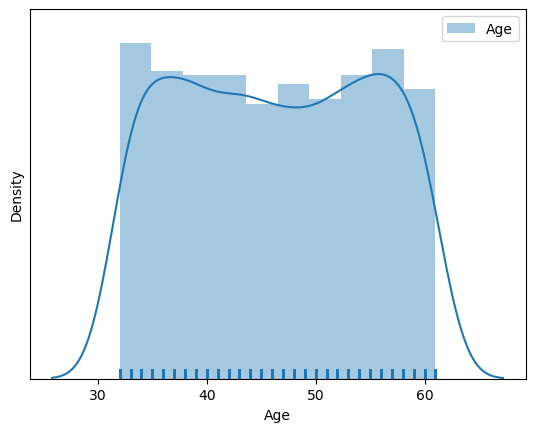

In [390]:
#Age Distribution of all the patients
sns.distplot(dfcp.Age,bins=10,label="Age",rug=True)
plt.yticks([])
plt.legend()
plt.show()

C:\Users\luka\AppData\Local\Temp\ipykernel_1812\2102030194.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(dfcp.BMI,bins=10,label="BMI",rug=True)


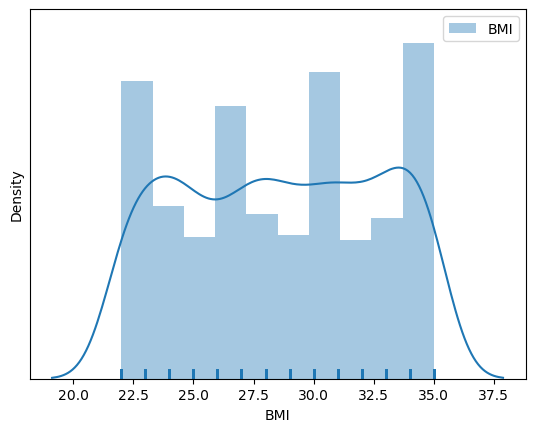

In [56]:
#BMI Distribution of all the patients-show no pattern
sns.distplot(dfcp.BMI,bins=10,label="BMI",rug=True)
plt.yticks([])
plt.legend()
plt.show()

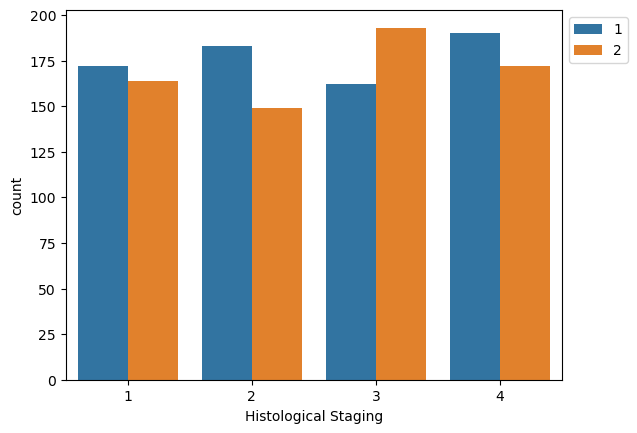

In [239]:
#Baseline Histological Staging across each gender
sns.countplot(x=d1['Histological Staging'], hue=d1.Gender)
plt.xlabel('Histological Staging')
plt.legend(bbox_to_anchor=(1,1))
plt.show()

In [179]:
#BMI values:
#18.5-24.9: Healthy | 25-29.9: Overweight | 30+: Obese
bins=[20,25,30,35]
labels=['Healthy','Overweight','Obese']
dfcp["bmiRange"]=pd.cut(dfcp.BMI,bins,labels=labels,include_lowest=True)

#Baseline Histological Staging based on BMI status
sns.countplot(x=dfcp['Baseline Histological Staging'], hue=dfcp.bmiRange, palette="viridis")
plt.xlabel('Histological Staging')
plt.legend(bbox_to_anchor=(1,1))
plt.show()

KeyError: 'Baseline Histological Staging'

<Axes: ylabel='count'>

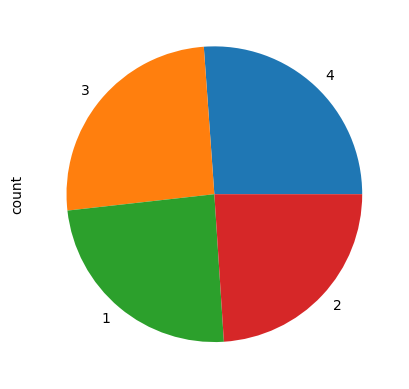

In [297]:
dfcp['Histological Staging'].value_counts().plot.pie()

In [289]:
#Random undersampling


# Classifiers for data set
x = dfcp.iloc[:,:-1].values
y = dfcp['Histological Staging'].values

rus = RandomUnderSampler(sampling_strategy=1)
x_res, y_res = rus.fit_resample(x,y)

print('Resampled dataset shape %s' % Counter(y_res))

x=x_res.copy()
y=y_res.copy()

ValueError: "sampling_strategy" can be a float only when the type of target is binary. For multi-class, use a dict.

In [11]:
# Classifiers for data set
#x = dfcp.iloc[:,:-1].values
x = dfcp.copy()
x.drop(['Histological Staging'], axis=1, inplace=True)
y = dfcp['Histological Staging'].values

# Spliting the data set to 80% for training 20% for testing
training_x, testing_x, training_y, testing_y = train_test_split(x,y, test_size=0.20)
Counter(testing_y)

Counter({3: 77, 1: 70, 4: 69, 2: 61})

In [200]:
#Smot oversampling

sm = SMOTE(random_state=42)
x_res, y_res = sm.fit_resample(training_x, training_y)
print('Resampled dataset shape %s' % Counter(y_res))


training_x=x_res.copy()
training_y=y_res.copy()

Resampled dataset shape Counter({2: 847, 1: 847})


In [118]:
training_x, testing_x, training_y, testing_y = train_test_split(x,y, test_size=0.20)

Max accuracy: 0.30685920577617326 k = 14


array([[18, 14, 12, 26],
       [16, 10, 15, 20],
       [19, 16, 18, 24],
       [12, 18, 15, 24]], dtype=int64)

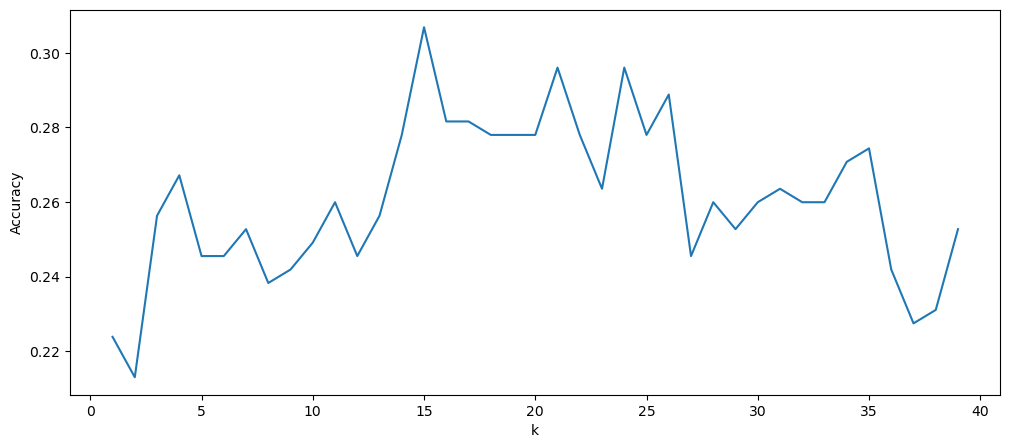

In [12]:
# Checking again with the Accuracy rate
accRate=[]
matrices={}
for i in range(1, 40):
    knn = KNeighborsClassifier(n_neighbors = i)
    knn.fit(training_x, training_y)
    predicting_i = knn.predict(testing_x)
    accRate.append(metrics.accuracy_score(testing_y, predicting_i))
    matrices.update({i: confusion_matrix(testing_y, predicting_i)})
# Plot the graph to see Accuracy Rate vs k values
plt.figure(figsize=(12,5))
plt.plot(range(1,40), accRate)
plt.xlabel('k')
plt.ylabel('Accuracy')

print("Max accuracy:", max(accRate), "k =", accRate.index(max(accRate)))
matrices[i]

In [35]:
# Define the parameter grid
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Initialize the Random Forest classifier
rf_classifier = RandomForestClassifier(random_state=42)

# Initialize GridSearchCV
grid_search = GridSearchCV(rf_classifier, param_grid, cv=5, scoring='accuracy')

# Fit the grid search to the data
grid_search.fit(training_x, training_y)

# Get the best parameters
best_params = grid_search.best_params_

# Train the classifier with the best parameters
best_rf_classifier = RandomForestClassifier(**best_params, random_state=42)
best_rf_classifier.fit(training_x, training_y)

# Make predictions on the testing data
y_pred_best = best_rf_classifier.predict(testing_x)

# Evaluate the performance of the tuned model
accuracy_best = accuracy_score(testing_y, y_pred_best)
conf_matrix_best = confusion_matrix(testing_y, y_pred_best)
classification_rep_best = classification_report(testing_y, y_pred_best)

# Print the results
print('Best Parameters:', best_params)
print(f'Accuracy (Tuned): {accuracy_best:.2f}')
print('\nConfusion Matrix (Tuned):')
print(conf_matrix_best)
print('\nClassification Report (Tuned):')
print(classification_rep_best)

Best Parameters: {'max_depth': None, 'min_samples_leaf': 4, 'min_samples_split': 10, 'n_estimators': 100}
Accuracy (Tuned): 0.20

Confusion Matrix (Tuned):
[[ 8 21 17 23]
 [16 12 11 19]
 [16 17 19 20]
 [11 28 22 17]]

Classification Report (Tuned):
              precision    recall  f1-score   support

           1       0.16      0.12      0.13        69
           2       0.15      0.21      0.18        58
           3       0.28      0.26      0.27        72
           4       0.22      0.22      0.22        78

    accuracy                           0.20       277
   macro avg       0.20      0.20      0.20       277
weighted avg       0.20      0.20      0.20       277



In [13]:
rf_classifier = RandomForestClassifier(random_state=42)

# Train the classifier on the training data
rf_classifier.fit(training_x, training_y)

# Make predictions on the testing data
y_pred = rf_classifier.predict(testing_x)

# Evaluate the performance of the model
accuracy = accuracy_score(testing_y, y_pred)
conf_matrix = confusion_matrix(testing_y, y_pred)
classification_rep = classification_report(testing_y, y_pred)

# Print the results
print(f'Accuracy: {accuracy:.2f}')
print('\nConfusion Matrix:')
print(conf_matrix)
print('\nClassification Report:')
print(classification_rep)
y_pred

Accuracy: 0.27

Confusion Matrix:
[[17 16 22 15]
 [12 14 17 18]
 [20 16 15 26]
 [13 11 16 29]]

Classification Report:
              precision    recall  f1-score   support

           1       0.27      0.24      0.26        70
           2       0.25      0.23      0.24        61
           3       0.21      0.19      0.20        77
           4       0.33      0.42      0.37        69

    accuracy                           0.27       277
   macro avg       0.27      0.27      0.27       277
weighted avg       0.27      0.27      0.27       277



array([4, 2, 2, 2, 3, 3, 1, 2, 4, 4, 2, 3, 4, 1, 3, 4, 1, 2, 1, 1, 4, 3,
       3, 3, 4, 2, 1, 2, 3, 3, 1, 1, 4, 3, 4, 4, 2, 4, 4, 4, 2, 4, 2, 4,
       2, 2, 3, 3, 3, 4, 4, 2, 4, 3, 4, 4, 1, 1, 1, 1, 1, 4, 1, 2, 3, 3,
       2, 1, 3, 4, 3, 2, 2, 2, 4, 4, 2, 4, 3, 4, 4, 2, 3, 1, 1, 4, 1, 3,
       4, 1, 4, 3, 1, 1, 3, 3, 3, 2, 2, 2, 1, 1, 4, 3, 2, 2, 1, 1, 4, 1,
       2, 1, 4, 3, 1, 1, 3, 4, 4, 2, 2, 3, 3, 1, 1, 3, 2, 4, 4, 4, 4, 3,
       3, 4, 3, 4, 4, 2, 2, 1, 1, 4, 4, 1, 2, 3, 3, 4, 4, 2, 2, 4, 2, 4,
       4, 3, 1, 3, 1, 4, 1, 1, 3, 3, 4, 3, 2, 1, 1, 2, 1, 3, 4, 4, 3, 2,
       2, 4, 4, 1, 3, 4, 3, 3, 1, 3, 2, 4, 1, 2, 3, 1, 2, 3, 1, 3, 4, 2,
       3, 2, 2, 3, 3, 1, 3, 4, 1, 3, 3, 2, 4, 2, 3, 4, 4, 1, 1, 1, 1, 3,
       2, 4, 3, 4, 3, 4, 4, 1, 2, 4, 4, 1, 4, 4, 2, 4, 4, 1, 1, 3, 3, 1,
       4, 3, 4, 3, 2, 4, 4, 3, 4, 1, 4, 3, 4, 1, 2, 3, 1, 1, 3, 4, 4, 4,
       4, 2, 3, 1, 2, 4, 4, 2, 4, 3, 2, 4, 4], dtype=int64)

In [33]:
# Create a Random Forest classifier
random_forest = RandomForestClassifier()

# Define hyperparameters to tune
param_dist = {
    'n_estimators': [50, 100, 150, 200],
    #'max_features': ['sqrt', 'log2'],
    'max_depth': [None, 5, 10, 15],
    'min_samples_split': [2, 3, 5, 10],
    'min_samples_leaf': [1, 2, 3, 4]
}

# Use RandomizedSearchCV to find the best hyperparameters
random_search = RandomizedSearchCV(random_forest, param_distributions=param_dist, n_iter=15, cv=5, random_state=42)
random_search.fit(training_x, training_y)

# Get the best hyperparameters
best_params = random_search.best_params_
print("Best Hyperparameters:", best_params)

# Train the classifier with the best hyperparameters
best_random_forest = RandomForestClassifier(**best_params)
best_random_forest.fit(training_x, training_y)

# Make predictions on the test set
predictions = best_random_forest.predict(testing_x)

# Evaluate the classifier
accuracy = accuracy_score(testing_y, predictions)
print("Accuracy:", accuracy)

# Display classification report
print("Classification Report:\n", classification_report(testing_y, predictions))


Best Hyperparameters: {'n_estimators': 200, 'min_samples_split': 3, 'min_samples_leaf': 3, 'max_depth': 10}
Accuracy: 0.20577617328519857
Classification Report:
               precision    recall  f1-score   support

           1       0.16      0.10      0.12        69
           2       0.17      0.19      0.18        58
           3       0.26      0.25      0.26        72
           4       0.21      0.27      0.24        78

    accuracy                           0.21       277
   macro avg       0.20      0.20      0.20       277
weighted avg       0.20      0.21      0.20       277



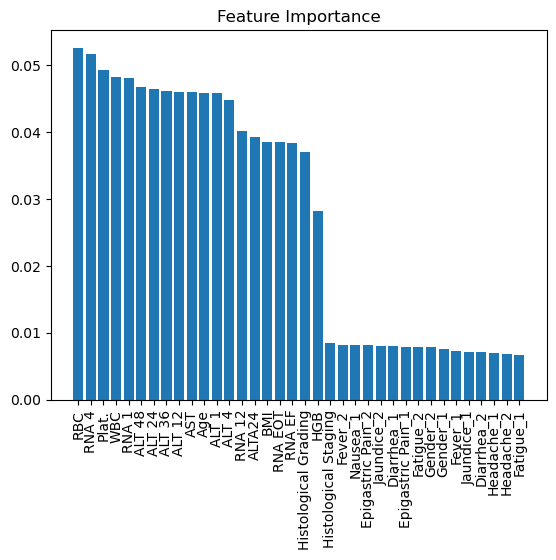

In [7]:
features = training_x.copy()
target = training_y.copy()

randomforest = RandomForestClassifier(random_state=0, n_jobs=-1)
# Train model
model = randomforest.fit(features, target)
# Calculate feature importances
importances = model.feature_importances_
# Sort feature importances in descending order
indices = np.argsort(importances)[::-1]
names = [dfcp.columns[i] for i in indices]
# Create plot
plt.figure()
# Create plot title
plt.title("Feature Importance")
# Add bars
plt.bar(range(features.shape[1]), importances[indices])
# Add feature names as x-axis labels
plt.xticks(range(features.shape[1]), names, rotation=90)
# Show plot
plt.show()

In [8]:
randomforest = RandomForestClassifier(random_state=0, n_jobs=-1)

# Create an object that selects features with importance greater
# than or equal to a threshold
selector = SelectFromModel(randomforest, threshold='mean')  # You can experiment with different threshold values

# Feature new feature matrix using selector
features_important = selector.fit_transform(features, target)

# Print selected features
selected_features = np.array(features.columns)[selector.get_support()]
print("Selected Features:", selected_features)

# Train random forest using the most important features
model = randomforest.fit(features_important, target)

# Evaluate the model using cross-validation
cv_score = cross_val_score(randomforest, features_important, target, cv=5, scoring='accuracy')
print("Cross-Validation Accuracy:", np.mean(cv_score))

NameError: name 'SelectFromModel' is not defined